In [377]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import re

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import numpy as np

In [378]:
df = pd.read_csv("./datasets/wtrqlty_grndwtr_2008.csv",encoding="cp1252")

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Station Code                                       346 non-null    int64  
 1   Water Quality                                      346 non-null    object 
 2   Locations                                          346 non-null    object 
 3   State Name                                         346 non-null    object 
 4   TEMPERATURE (degree Centigrade)-Minimum            323 non-null    float64
 5   TEMPERATURE (degree Centigrade)-Maximum            323 non-null    float64
 6   TEMPERATURE (degree Centigrade)-Mean               323 non-null    float64
 7   Dissolved Oxygen(D.O.) (mg/l)-Minimum              0 non-null      float64
 8   Dissolved Oxygen(D.O.) (mg/l)-Maximum              0 non-null      float64
 9   Dissolved 

### Handling Missing Values

- Columns 7,8,9 : Dissolved Oxygen(D.O.) columns are missing entirely. We will have to drop these columns.
- Rest columns have less number of missing values, EXCEPT Nitrite-N Columns, which have only 70 non-null values. We will drop these columns as well, i see no other way.
- For the missing values in rest of the columns we will use MICE for imputation.


In [380]:
df.drop(columns=[
    'NITRITE-N (mg/l)-Minimum',
    'NITRITE-N (mg/l)-Maximum',
    'NITRITE-N (mg/l)-Mean',
    'Dissolved Oxygen(D.O.) (mg/l)-Minimum',
    'Dissolved Oxygen(D.O.) (mg/l)-Maximum',
    'Dissolved Oxygen(D.O.) (mg/l)-Mean'
], inplace=True)

In [381]:
mice_columns = ['State Name','TEMPERATURE (degree Centigrade)-Minimum',
       'TEMPERATURE (degree Centigrade)-Maximum',
       'TEMPERATURE (degree Centigrade)-Mean', 'pH-Minimum', 'pH-Maximum',
       'pH-Mean', 'CONDUCTIVITY (µmhos/cm)-Minimum',
       'CONDUCTIVITY (µmhos/cm)-Maximum', 'CONDUCTIVITY (µmhos/cm)-Mean',
       'Biochemical oxygen demand (B.O.D.) (mg/l)-Minimum',
       'Biochemical oxygen demand (B.O.D.) (mg/l)-Maximum',
       'Biochemical oxygen demand (B.O.D.) (mg/l)-Mean',
       'NITRATE- N (mg/l)-Minimum', 'NITRATE- N (mg/l)-Maximum',
       'NITRATE- N (mg/l)-Mean', 'FECAL COLIFORM (MPN/100ml)-Minimum',
       'FECAL COLIFORM (MPN/100ml)-Maximum', 'FECAL COLIFORM (MPN/100ml)-Mean',
       'TOTAL COLIFORM (MPN/100ml)-Minimum',
       'TOTAL COLIFORM (MPN/100ml)-Maximum',
       'TOTAL COLIFORM (MPN/100ml)-Mean']

In [382]:
df_subset = df[mice_columns].copy()
le = LabelEncoder()
df_subset['State Name'] = le.fit_transform(df_subset['State Name'])

In [383]:
df_subset

,State Name,TEMPERATURE (degree Centigrade)-Minimum,TEMPERATURE (degree Centigrade)-Maximum,TEMPERATURE (degree Centigrade)-Mean,pH-Minimum,pH-Maximum,pH-Mean,CONDUCTIVITY (µmhos/cm)-Minimum,CONDUCTIVITY (µmhos/cm)-Maximum,CONDUCTIVITY (µmhos/cm)-Mean,...,Biochemical oxygen demand (B.O.D.) (mg/l)-Mean,NITRATE- N (mg/l)-Minimum,NITRATE- N (mg/l)-Maximum,NITRATE- N (mg/l)-Mean,FECAL COLIFORM (MPN/100ml)-Minimum,FECAL COLIFORM (MPN/100ml)-Maximum,FECAL COLIFORM (MPN/100ml)-Mean,TOTAL COLIFORM (MPN/100ml)-Minimum,TOTAL COLIFORM (MPN/100ml)-Maximum,TOTAL COLIFORM (MPN/100ml)-Mean
0,0,22.0,28.0,25.0,6.9,7.3,7.1,164.0,191.0,178.0,...,0.5,0.1,0.4,0.3,1.0,2.0,2.0,16.0,260.0,138.0
1,0,22.0,26.0,24.0,6.7,7.2,7.0,755.0,1039.0,897.0,...,0.8,1.3,7.0,4.2,1.0,2.0,2.0,8.0,20.0,14.0
2,0,30.0,30.0,30.0,7.4,7.4,7.4,1101.0,1101.0,1101.0,...,0.8,1.8,1.8,1.8,2.0,2.0,2.0,1100.0,1100.0,1100.0
3,0,22.0,22.0,22.0,7.9,8.0,8.0,543.0,769.0,656.0,...,NaN,1.5,1.5,1.5,2.0,2.0,2.0,50.0,50.0,50.0
4,0,20.0,25.0,23.0,7.0,7.1,7.1,900.0,1463.0,1182.0,...,0.3,9.0,12.0,10.5,2.0,40.0,21.0,24.0,800.0,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,20,28.0,28.0,28.0,7.4,7.7,7.6,461.0,469.0,465.0,...,0.8,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
342,20,31.0,33.0,32.0,7.3,7.4,7.4,1648.0,1675.0,1662.0,...,0.7,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
343,20,30.0,31.0,31.0,7.8,7.8,7.8,635.0,637.0,636.0,...,1.4,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
344,20,29.0,30.0,30.0,7.3,7.6,7.5,133.0,141.0,137.0,...,0.9,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [384]:
imp = IterativeImputer(max_iter=10, random_state=1337)
imputer = imp.fit(df_subset[mice_columns])

In [385]:
df_imputed = imputer.fit_transform(df_subset)

In [386]:
df_imputed = pd.DataFrame(df_imputed, columns=mice_columns)

In [387]:
df_imputed

,State Name,TEMPERATURE (degree Centigrade)-Minimum,TEMPERATURE (degree Centigrade)-Maximum,TEMPERATURE (degree Centigrade)-Mean,pH-Minimum,pH-Maximum,pH-Mean,CONDUCTIVITY (µmhos/cm)-Minimum,CONDUCTIVITY (µmhos/cm)-Maximum,CONDUCTIVITY (µmhos/cm)-Mean,...,Biochemical oxygen demand (B.O.D.) (mg/l)-Mean,NITRATE- N (mg/l)-Minimum,NITRATE- N (mg/l)-Maximum,NITRATE- N (mg/l)-Mean,FECAL COLIFORM (MPN/100ml)-Minimum,FECAL COLIFORM (MPN/100ml)-Maximum,FECAL COLIFORM (MPN/100ml)-Mean,TOTAL COLIFORM (MPN/100ml)-Minimum,TOTAL COLIFORM (MPN/100ml)-Maximum,TOTAL COLIFORM (MPN/100ml)-Mean
0,0.0,22.0,28.0,25.0,6.9,7.3,7.1,164.0,191.0,178.0,...,0.50000,0.1,0.4,0.3,1.0,2.0,2.0,16.0,260.0,138.0
1,0.0,22.0,26.0,24.0,6.7,7.2,7.0,755.0,1039.0,897.0,...,0.80000,1.3,7.0,4.2,1.0,2.0,2.0,8.0,20.0,14.0
2,0.0,30.0,30.0,30.0,7.4,7.4,7.4,1101.0,1101.0,1101.0,...,0.80000,1.8,1.8,1.8,2.0,2.0,2.0,1100.0,1100.0,1100.0
3,0.0,22.0,22.0,22.0,7.9,8.0,8.0,543.0,769.0,656.0,...,2.13371,1.5,1.5,1.5,2.0,2.0,2.0,50.0,50.0,50.0
4,0.0,20.0,25.0,23.0,7.0,7.1,7.1,900.0,1463.0,1182.0,...,0.30000,9.0,12.0,10.5,2.0,40.0,21.0,24.0,800.0,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,20.0,28.0,28.0,28.0,7.4,7.7,7.6,461.0,469.0,465.0,...,0.80000,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
342,20.0,31.0,33.0,32.0,7.3,7.4,7.4,1648.0,1675.0,1662.0,...,0.70000,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
343,20.0,30.0,31.0,31.0,7.8,7.8,7.8,635.0,637.0,636.0,...,1.40000,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
344,20.0,29.0,30.0,30.0,7.3,7.6,7.5,133.0,141.0,137.0,...,0.90000,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
le.classes_[0]

'ANDHRA PRADESH'

In [389]:
df_imputed['State Name STR'] = df_imputed['State Name'].apply(lambda x: le.classes_[int(x)])

In [390]:
def categorize_water_source(location: str) -> str:
    loc = str(location).upper()

    if 'B/W' in loc or 'B W' in loc or 'TUBE WELL' in loc:
        return 'Bore Well'
    elif 'O/W' in loc or 'O W' in loc or re.search(r'\bWELL\b', loc):
        return 'Open Well'
    elif 'RIVER' in loc or 'LAKE' in loc:
        return 'Surface Water'
    else:
        return 'Ground Water'

In [391]:
df['Water_Source_Type'] = df['Locations'].apply(categorize_water_source)

In [392]:
df_imputed['Water_Source_Type'] = df['Water_Source_Type']

In [393]:
df_imputed.to_csv("./datasets/cleaned.csv")

In [394]:
df_imputed.columns

Index(['State Name', 'TEMPERATURE (degree Centigrade)-Minimum',
       'TEMPERATURE (degree Centigrade)-Maximum',
       'TEMPERATURE (degree Centigrade)-Mean', 'pH-Minimum', 'pH-Maximum',
       'pH-Mean', 'CONDUCTIVITY (µmhos/cm)-Minimum',
       'CONDUCTIVITY (µmhos/cm)-Maximum', 'CONDUCTIVITY (µmhos/cm)-Mean',
       'Biochemical oxygen demand (B.O.D.) (mg/l)-Minimum',
       'Biochemical oxygen demand (B.O.D.) (mg/l)-Maximum',
       'Biochemical oxygen demand (B.O.D.) (mg/l)-Mean',
       'NITRATE- N (mg/l)-Minimum', 'NITRATE- N (mg/l)-Maximum',
       'NITRATE- N (mg/l)-Mean', 'FECAL COLIFORM (MPN/100ml)-Minimum',
       'FECAL COLIFORM (MPN/100ml)-Maximum', 'FECAL COLIFORM (MPN/100ml)-Mean',
       'TOTAL COLIFORM (MPN/100ml)-Minimum',
       'TOTAL COLIFORM (MPN/100ml)-Maximum', 'TOTAL COLIFORM (MPN/100ml)-Mean',
       'State Name STR', 'Water_Source_Type'],
      dtype='object')

In [395]:
hist_multiplot_cols = [
    'TEMPERATURE (degree Centigrade)-Mean',
    'CONDUCTIVITY (µmhos/cm)-Mean',
    'Biochemical oxygen demand (B.O.D.) (mg/l)-Mean',
    'NITRATE- N (mg/l)-Mean',
    'FECAL COLIFORM (MPN/100ml)-Mean',
    'TOTAL COLIFORM (MPN/100ml)-Mean'
]

def get_custom_palette(df, hue_col):
    colors = ['#7a1de7', '#2c3be7', '#0050ff', '#00bfff']
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue_purple', colors)
    unique_hue_values = df[hue_col].unique()
    return dict(zip(unique_hue_values, [cmap(i) for i in np.linspace(0, 1, len(unique_hue_values))]))

def apply_rounded_bars(ax):
    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color = patch.get_facecolor()
        width = abs(bb.width)
        height = abs(bb.height)
        p_bbox = patches.FancyBboxPatch(
            (bb.xmin, bb.ymin),
            width,
            height,
            boxstyle="round,pad=-0.0040,rounding_size=0.1",
            ec="none",
            fc=color,
            mutation_aspect=0.2,
            zorder=3
        )
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)

def plot_histograms(df, columns, hue_col='Water_Source_Type', axes=None, layout=None):
    palette = get_custom_palette(df, hue_col)

    if axes is None:
        if layout is None:
            layout = (1, len(columns))
        n_rows, n_cols = layout
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
        axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
    else:
        fig = plt.gcf()
        axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')
    for i, col in enumerate(columns):
        if i >= len(axes):
            break
        ax = axes[i]
        sns.histplot(data=df, x=col, kde=True, bins=30, palette=palette, hue=hue_col, ax=ax)
        apply_rounded_bars(ax)
        ax.set_title(col, fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Count')

    return fig, axes

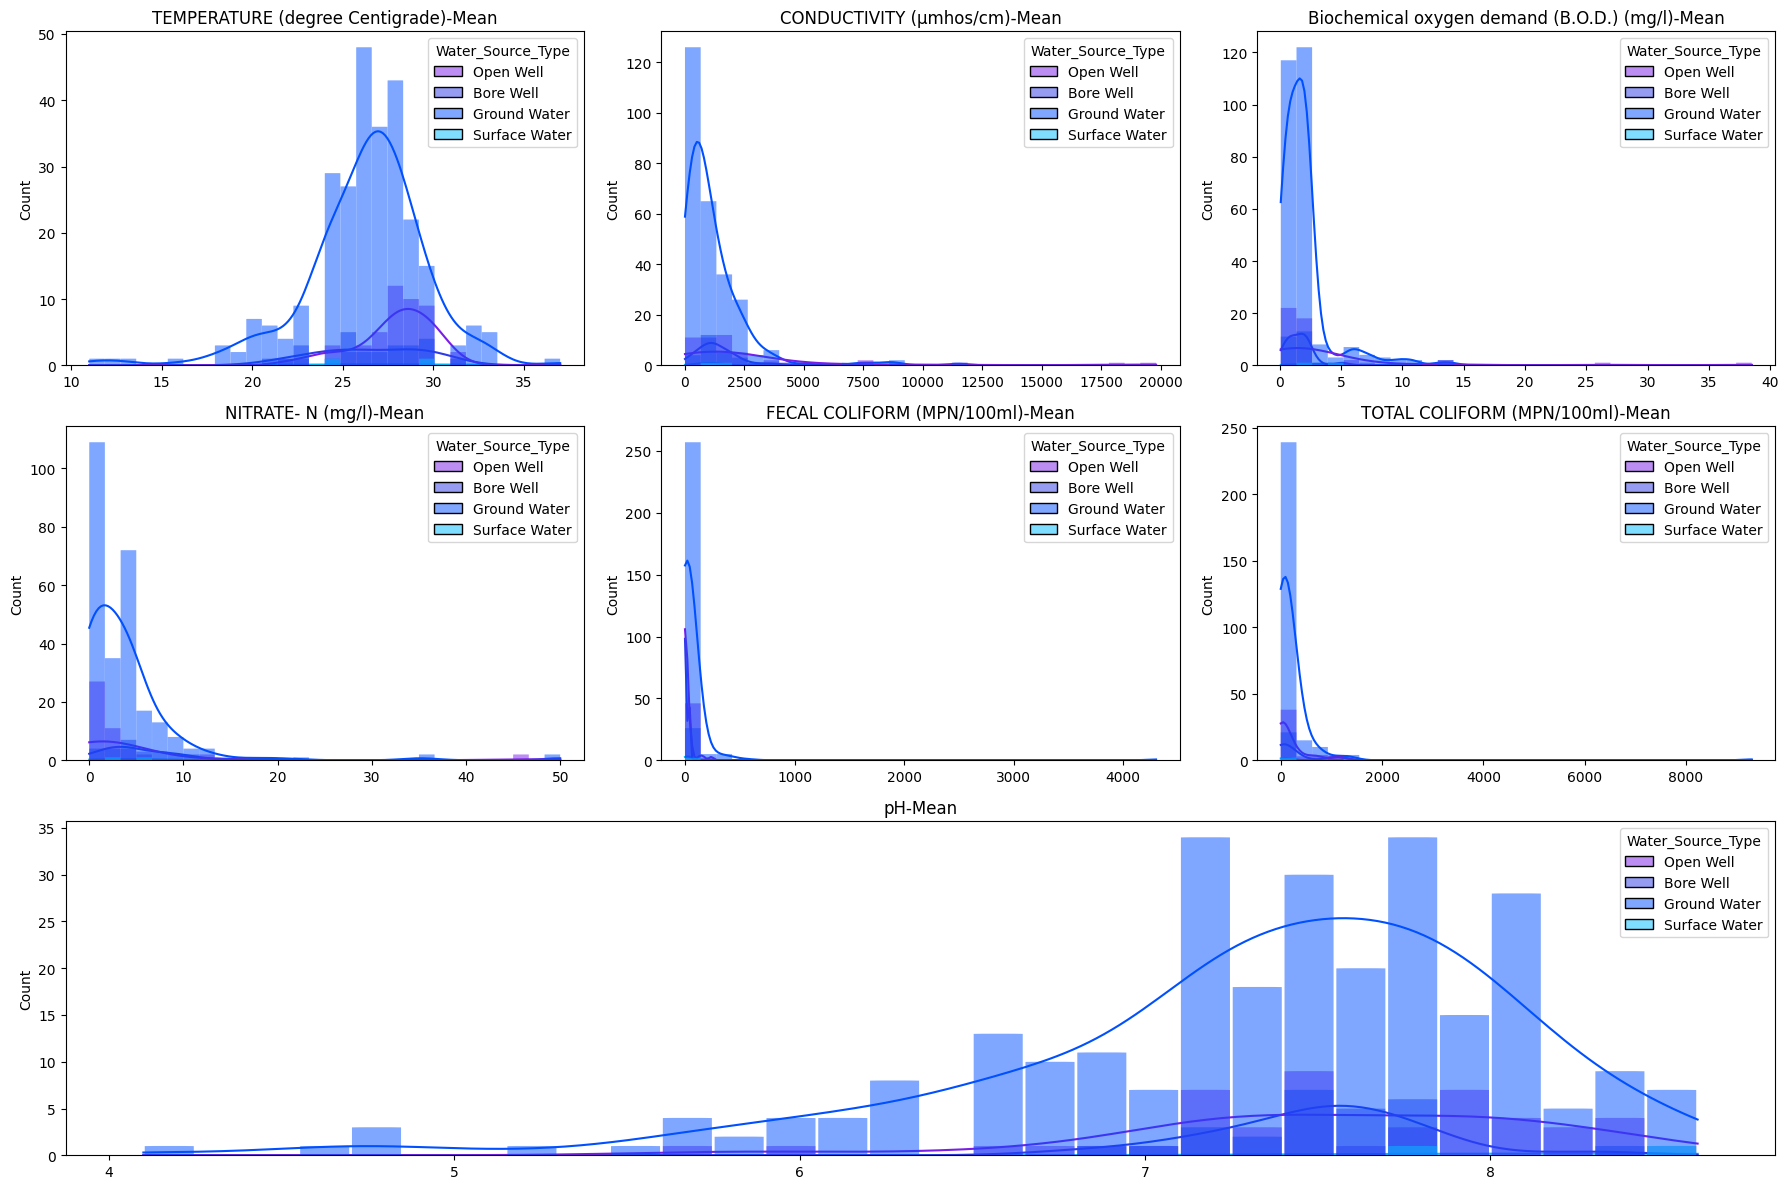

In [396]:
fig, axes = plot_histograms(df_imputed, hist_multiplot_cols, layout=(3, 3))

# Call 2: Add another plot on a fresh axis below
ax_full = fig.add_subplot(3, 3, (7, 9))
_, _ = plot_histograms(df_imputed, ['pH-Mean'], axes=[ax_full])
plt.tight_layout()
plt.show()

<Axes: xlabel='Water_Source_Type', ylabel='pH-Mean'>

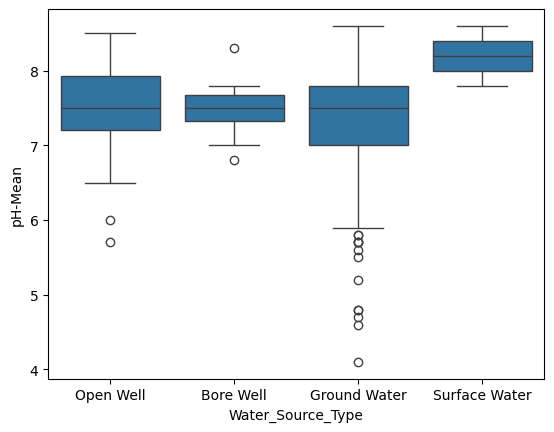

In [397]:
sns.boxplot(data=df_imputed, x='Water_Source_Type', y='pH-Mean')

In [398]:
df_imputed[hist_multiplot_cols].corr(numeric_only=True)

,TEMPERATURE (degree Centigrade)-Mean,CONDUCTIVITY (µmhos/cm)-Mean,Biochemical oxygen demand (B.O.D.) (mg/l)-Mean,NITRATE- N (mg/l)-Mean,FECAL COLIFORM (MPN/100ml)-Mean,TOTAL COLIFORM (MPN/100ml)-Mean
TEMPERATURE (degree Centigrade)-Mean,1.000000,0.065503,-0.040984,-0.025933,0.061947,0.047510
CONDUCTIVITY (µmhos/cm)-Mean,0.065503,1.000000,0.185186,0.020514,-0.036043,0.002470
Biochemical oxygen demand (B.O.D.) (mg/l)-Mean,-0.040984,0.185186,1.000000,0.183942,-0.033085,-0.020116
NITRATE- N (mg/l)-Mean,-0.025933,0.020514,0.183942,1.000000,-0.012562,-0.003133
FECAL COLIFORM (MPN/100ml)-Mean,0.061947,-0.036043,-0.033085,-0.012562,1.000000,0.914703
TOTAL COLIFORM (MPN/100ml)-Mean,0.047510,0.002470,-0.020116,-0.003133,0.914703,1.000000


<Axes: >

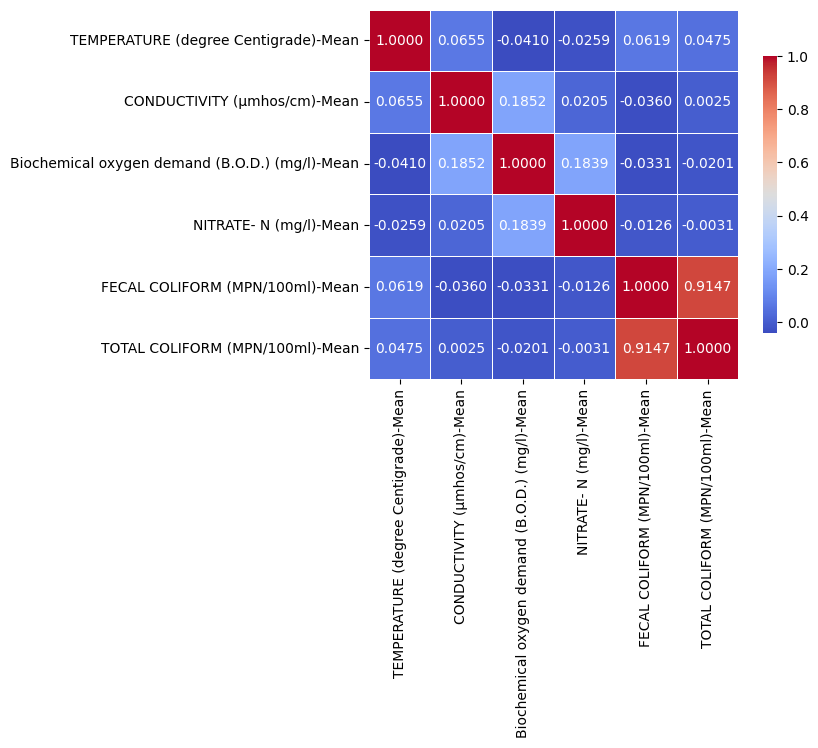

In [399]:
sns.heatmap(df_imputed[hist_multiplot_cols].corr(numeric_only=True), annot=True, cmap='coolwarm', square=True, linecolor='white', linewidths=0.5, cbar_kws={'shrink': 0.75}, fmt='.4f')

### Key Observations

 - Fecal Coliform vs. Total Coliform

   - Extremely strong positive correlation (0.915)
   - This indicates fecal and total coliform levels are closely linked, as both originate from similar contamination sources (e.g., sewage, animal waste).

 - Biochemical Oxygen Demand (BOD)
   - Moderate positive correlation with Conductivity (0.185)
   - Higher conductivity (dissolved ions) may reflect organic pollutants contributing to BOD.


 - Notable Absences of Correlation
   - Conductivity does not strongly correlate with nitrate or coliforms, implying dissolved ions may stem from non-organic sources (e.g., geological minerals).
   - Coliforms show minimal links to BOD/nitrate, suggesting fecal contamination arises independently of nutrient pollution in these locations.

 - Implications for Water Management
   - Coliform monitoring: Strong correlation between fecal and total coliforms allows prioritizing one for cost-effective testing.
   - BOD-Conductivity relationship: Could help identify organic pollution hotspots indirectly via conductivity measurements.
   - Independent parameters: Temperature and nitrate may require separate monitoring strategies due to their lack of interdependency.


In [400]:
import geopandas as gpd

In [401]:
gdf = gpd.read_file("./assets/india_st.dbf")

In [402]:
df_statewise = df_imputed.groupby("State Name STR", as_index=False)[['TEMPERATURE (degree Centigrade)-Mean',
 'CONDUCTIVITY (µmhos/cm)-Mean',
 'Biochemical oxygen demand (B.O.D.) (mg/l)-Mean',
 'NITRATE- N (mg/l)-Mean',
 'FECAL COLIFORM (MPN/100ml)-Mean',
 'TOTAL COLIFORM (MPN/100ml)-Mean', 'pH-Mean']].mean()

In [427]:
geopandas_df = gdf.merge(df_statewise, left_on='STATE', right_on='State Name STR', how='left')
geopandas_df =geopandas_df.drop(columns=['State Name STR'])

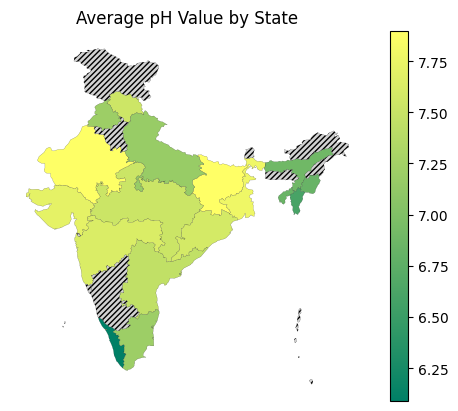

In [442]:
geopandas_df.plot(
    column="pH-Mean",
    cmap="summer",
    legend=True,
    edgecolor="black",
    linewidth=0.1,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "hatch": "//////",
        "label": "No data"
    }
)
plt.title("Average pH Value by State")
plt.axis('off')
plt.show()

In [447]:
df_statewise.to_csv("./datasets/statewise.csv")

In [448]:
df_statewise

,State Name STR,TEMPERATURE (degree Centigrade)-Mean,CONDUCTIVITY (µmhos/cm)-Mean,Biochemical oxygen demand (B.O.D.) (mg/l)-Mean,NITRATE- N (mg/l)-Mean,FECAL COLIFORM (MPN/100ml)-Mean,TOTAL COLIFORM (MPN/100ml)-Mean,pH-Mean
0,ANDHRA PRADESH,25.782609,1467.652174,1.299261,7.078261,8.423424,375.858205,7.456522
1,ASSAM,22.906250,521.750000,1.840625,0.814063,33.906250,264.093750,6.881250
2,BIHAR,24.650000,556.800000,2.135540,1.979802,6.000000,11.450000,7.895000
3,CHANDIGARH,24.923290,987.279814,0.591329,7.217542,42.553284,191.979244,7.281328
4,CHHATTISGARH,27.750000,1794.250000,0.800000,32.000000,39.809208,94.904230,7.900000
5,DAMAN AND DIU,26.568400,1603.000000,38.500000,46.550000,48.214957,204.626126,7.500000
6,GUJARAT,28.322581,2644.548387,3.066129,2.293167,149.253330,339.954996,7.711290
7,HIMACHAL PRADESH,23.842105,730.157895,2.321453,3.901590,34.081570,160.093247,7.536842
8,KERALA,27.633333,252.733333,0.746667,4.383333,121.976564,332.433333,6.090000
9,MADHYA PRADESH,26.348125,1407.000000,1.536574,4.686641,41.758190,87.090423,7.521429
